### Data Collection:

In [1]:
#Imporing necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataframe:
df = pd.read_excel('new_data.xlsx')
df.drop('Unnamed: 0',axis=1,inplace = True)
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


### Data Preparation:

In [3]:
#Checking class imbalance:
df['class'].value_counts()

class
non-bankruptcy    143
bankruptcy        107
Name: count, dtype: int64

In [4]:
#Dropping the duplicated and then checking for class imbalance again:
df = df.drop_duplicates()
df['class'].value_counts()

class
non-bankruptcy    78
bankruptcy        25
Name: count, dtype: int64

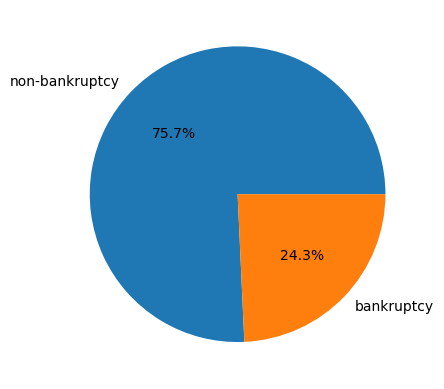

In [5]:
#Visualizing class imbalance:
df['class'].value_counts().plot(kind='pie',autopct='%1.1f%%', labels=['non-bankruptcy', 'bankruptcy'])
plt.ylabel('')
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder
#Converting categorical variables in target column into numerical data:

le = LabelEncoder()
df['class']=le.fit_transform(df['class'])
df.head()
#0 = Bankruptcy
#1 = Non-Bankruptcy

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [7]:
#Splitting the data into features(X) and labels(y):

X = df.drop('class',axis=1)
y = df['class']
print(X.shape)
print(y.shape)

(103, 6)
(103,)


In [8]:
#Using over-sampling techinique to fix class imbalance:

from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

In [9]:
#Checking for class imbalance again:
y_resampled.value_counts()

class
1    78
0    76
Name: count, dtype: int64

In [10]:
# Split the data into train and test with test size of 20%:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2,random_state=42)

## Model Selection & Evaluation:

### Logistic Regression:

- It is simple, fast, and interpretable.

- It can handle multi-collinearity and interaction effects among the features.

- It can provide confidence intervals and significance tests for the coefficients.

In [11]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(X_train,y_train)# fit the model to the training data

LogisticRegression()

In [12]:
y_train_pred = log_clf.predict(X_train)
y_pred = log_clf.predict(X_test)

In [13]:
# Evaluate the model performance:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report,f1_score,recall_score,precision_score


print("Accuracy of train data:", accuracy_score(y_train, y_train_pred))
print("Accuracy of test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:\n", roc_auc_score(y_test, y_pred))

Accuracy of train data: 1.0
Accuracy of test data: 1.0
Confusion Matrix:
 [[15  0]
 [ 0 16]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        16

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31

ROC AUC Score:
 1.0


In [14]:
#Adding the metrics into a dataframe:
results=[]
model_name   = 'Logistic Regression'
accuracy_sc  = accuracy_score(y_test, y_pred)
precision_sc = precision_score(y_test, y_pred)
recall_sc    = recall_score(y_test, y_pred)
f1_sc        = f1_score(y_test, y_pred)
roc_auc_sc   = roc_auc_score(y_test, y_pred)
    
results.append((model_name, accuracy_sc, precision_sc, recall_sc, f1_sc, roc_auc_sc))

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy Score', 'Precision Score', 'Recall Score', 'F1-Score', 'ROC-AUC Score'])

In [15]:
results_df

,Model,Accuracy Score,Precision Score,Recall Score,F1-Score,ROC-AUC Score
0,Logistic Regression,1.0,1.0,1.0,1.0,1.0


### Decision Tree:

- It is intuitive, flexible, and easy to visualize.

- It can capture non-linear and complex patterns from the data.

- It can handle missing values and irrelevant features.

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier() 
dt_clf.fit(X_train,y_train)# fit the model to the training data

DecisionTreeClassifier()

The choice of criterion depends on the data and the problem at hand.

Use gini if you want a faster and simpler computation, or if your classes are balanced and well-separated.

Use entropy if you want a more sensitive and informative measure, or if your classes are imbalanced or overlapping.

In [17]:
y_train_pred = dt_clf.predict(X_train) # predict the training data
y_pred = dt_clf.predict(X_test) # predict the test data

In [18]:
# Evaluate the model performance
print("Accuracy of train data:", accuracy_score(y_train, y_train_pred))
print("Accuracy of test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:\n", roc_auc_score(y_test, y_pred))

Accuracy of train data: 1.0
Accuracy of test data: 0.967741935483871
Confusion Matrix:
 [[14  1]
 [ 0 16]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.94      1.00      0.97        16

    accuracy                           0.97        31
   macro avg       0.97      0.97      0.97        31
weighted avg       0.97      0.97      0.97        31

ROC AUC Score:
 0.9666666666666667


Observation: Slight overfitting model

In [19]:
#Adding the metrics into results_df dataframe:
model_name   = 'Decision Tree Classifier'
accuracy_sc  = accuracy_score(y_test, y_pred)
precision_sc = precision_score(y_test, y_pred)
recall_sc    = recall_score(y_test, y_pred)
f1_sc        = f1_score(y_test, y_pred)
roc_auc_sc   = roc_auc_score(y_test, y_pred)
    
results_df.loc[1]=[model_name, accuracy_sc, precision_sc, recall_sc, f1_sc, roc_auc_sc]

results_df 

,Model,Accuracy Score,Precision Score,Recall Score,F1-Score,ROC-AUC Score
0,Logistic Regression,1.000000,1.000000,1.0,1.000000,1.000000
1,Decision Tree Classifier,0.967742,0.941176,1.0,0.969697,0.966667


### Random Forest:

- It is robust to noise and outliers, and can avoid overfitting by using bagging and random feature selection.

- It can capture non-linear and complex patterns from the data, and can also handle missing values and imbalanced data.

- It is fast, scalable, and optimized for performance, and can also handle high-dimensional data.

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier() 
rf_clf.fit(X_train,y_train)# fit the model to the training data

RandomForestClassifier()

In [21]:
y_train_pred = rf_clf.predict(X_train) # predict the training data
y_pred = rf_clf.predict(X_test) # predict the test data

In [22]:
# Evaluate the model performance
print("Accuracy of train data:", accuracy_score(y_train, y_train_pred))
print("Accuracy of test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:\n", roc_auc_score(y_test, y_pred))

Accuracy of train data: 1.0
Accuracy of test data: 0.967741935483871
Confusion Matrix:
 [[14  1]
 [ 0 16]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.94      1.00      0.97        16

    accuracy                           0.97        31
   macro avg       0.97      0.97      0.97        31
weighted avg       0.97      0.97      0.97        31

ROC AUC Score:
 0.9666666666666667


In [23]:
#Adding the metrics into results_df dataframe:
model_name   = 'Random Forest Classifier'
accuracy_sc  = accuracy_score(y_test, y_pred)
precision_sc = precision_score(y_test, y_pred)
recall_sc    = recall_score(y_test, y_pred)
f1_sc        = f1_score(y_test, y_pred)
roc_auc_sc   = roc_auc_score(y_test, y_pred)
    
results_df.loc[2]=[model_name, accuracy_sc, precision_sc, recall_sc, f1_sc, roc_auc_sc]

results_df 

,Model,Accuracy Score,Precision Score,Recall Score,F1-Score,ROC-AUC Score
0,Logistic Regression,1.000000,1.000000,1.0,1.000000,1.000000
1,Decision Tree Classifier,0.967742,0.941176,1.0,0.969697,0.966667
2,Random Forest Classifier,0.967742,0.941176,1.0,0.969697,0.966667


### KNN :

- It is simple, intuitive, and easy to implement.

- It can adapt to the local structure of the data, and can capture non-linear and complex patterns.

- It does not require any assumptions about the distribution of the data, and can handle noisy and missing data.

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier() #default n_neighbours = 5
knn_clf.fit(X_train,y_train)# fit the model to the training data

KNeighborsClassifier()

In [25]:
y_train_pred = knn_clf.predict(X_train) # predict the training data
y_pred = knn_clf.predict(X_test) # predict the test data

In [26]:
# Evaluate the model performance
print("Accuracy of train data:", accuracy_score(y_train, y_train_pred))
print("Accuracy of test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:\n", roc_auc_score(y_test, y_pred))

Accuracy of train data: 1.0
Accuracy of test data: 1.0
Confusion Matrix:
 [[15  0]
 [ 0 16]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        16

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31

ROC AUC Score:
 1.0


In [27]:
#Adding the metrics into results_df dataframe:
model_name   = 'KNN Classifier'
accuracy_sc  = accuracy_score(y_test, y_pred)
precision_sc = precision_score(y_test, y_pred)
recall_sc    = recall_score(y_test, y_pred)
f1_sc        = f1_score(y_test, y_pred)
roc_auc_sc   = roc_auc_score(y_test, y_pred)
    
results_df.loc[3]=[model_name, accuracy_sc, precision_sc, recall_sc, f1_sc, roc_auc_sc]

results_df 

,Model,Accuracy Score,Precision Score,Recall Score,F1-Score,ROC-AUC Score
0,Logistic Regression,1.000000,1.000000,1.0,1.000000,1.000000
1,Decision Tree Classifier,0.967742,0.941176,1.0,0.969697,0.966667
2,Random Forest Classifier,0.967742,0.941176,1.0,0.969697,0.966667
3,KNN Classifier,1.000000,1.000000,1.0,1.000000,1.000000


### SVM :

- It is robust to noise and outliers, and can avoid overfitting by using regularization and cross-validation.

- It can capture complex and non-linear patterns from the data, and can also handle imbalanced data.

- It is fast, scalable, and optimized for performance, and can also handle missing values.

In [28]:
from sklearn.svm import SVC

svm_clf = SVC() 
svm_clf.fit(X_train,y_train)# fit the model to the training data

SVC()

In [29]:
y_train_pred = svm_clf.predict(X_train) # predict the training data
y_pred = svm_clf.predict(X_test) # predict the test data

In [30]:
# Evaluate the model performance
print("Accuracy of train data:", accuracy_score(y_train, y_train_pred))
print("Accuracy of test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:\n", roc_auc_score(y_test, y_pred))

Accuracy of train data: 1.0
Accuracy of test data: 1.0
Confusion Matrix:
 [[15  0]
 [ 0 16]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        16

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31

ROC AUC Score:
 1.0


In [31]:
#Adding the metrics into results_df dataframe:
model_name   = 'SVM Classifier'
accuracy_sc  = accuracy_score(y_test, y_pred)
precision_sc = precision_score(y_test, y_pred)
recall_sc    = recall_score(y_test, y_pred)
f1_sc        = f1_score(y_test, y_pred)
roc_auc_sc   = roc_auc_score(y_test, y_pred)
    
results_df.loc[4]=[model_name, accuracy_sc, precision_sc, recall_sc, f1_sc, roc_auc_sc]

results_df 

,Model,Accuracy Score,Precision Score,Recall Score,F1-Score,ROC-AUC Score
0,Logistic Regression,1.000000,1.000000,1.0,1.000000,1.000000
1,Decision Tree Classifier,0.967742,0.941176,1.0,0.969697,0.966667
2,Random Forest Classifier,0.967742,0.941176,1.0,0.969697,0.966667
3,KNN Classifier,1.000000,1.000000,1.0,1.000000,1.000000
4,SVM Classifier,1.000000,1.000000,1.0,1.000000,1.000000


#### Conclusion:

Most data sets have some noise and variability that prevent the model from achieving 100% accuracy. This data set is too simple, too small and too clean.

Hence, the model has learned the underlying pattern perfectly and is also able to generalize perfectly to new data as well. 

However, this is very rare and unlikely in real-world scenarios.

#### Final Model : KNN CLASSIFIER

In [32]:
#Pickling the KNN model for deployment:

import pickle 

pickle_out = open("KNN.pkl",mode = "wb")
pickle.dump(knn_clf,pickle_out)
pickle_out.close()